In [1]:
import pandas as pd

In [2]:
instancesHeader = ['GRAPH', 'SOURCE', 'TARGET']

instancesDf = pd.read_csv('gridInstances.inst', delimiter=' ', header=None, names=instancesHeader)
instancesDf['GRAPH'] = instancesDf['GRAPH'].apply(lambda x : "4d_" + x.split('/')[-1])
instancesDf

,GRAPH,SOURCE,TARGET
0,4d_Grid-Problem1.grid,6830,9316
1,4d_Grid-Problem1.grid,8061,9523
2,4d_Grid-Problem1.grid,5317,5903
3,4d_Grid-Problem1.grid,877,768
4,4d_Grid-Problem1.grid,2065,125
...,...,...,...
995,4d_Grid-Problem10.grid,6840,9014
996,4d_Grid-Problem10.grid,7354,8904
997,4d_Grid-Problem10.grid,8471,9620
998,4d_Grid-Problem10.grid,3813,8213


In [3]:
resultsHeader = ['ALGO', 'HOST' , 'GRAPH', 'NODES', 'ARCS' ,'SOURCE', 'TARGET', 'ITERATIONS', 'EXTRACTIONS', 'TARGET_SOLUTIONS', 'TIME', 'MEMORY', 'MAX_HEAP_SIZE']

mdaDf = pd.read_csv('mda_grids_4d.csv', delimiter=';', header=None, names=resultsHeader)
martinsDf = pd.read_csv('martins_grids_4d.csv', delimiter=';', header=None, names=resultsHeader)

mergedDf = pd.merge(instancesDf, mdaDf, on=['GRAPH','SOURCE', 'TARGET'], how='left')

In [4]:
mergedDf = pd.merge(mergedDf, martinsDf, on=['GRAPH', 'SOURCE', 'TARGET'], how='left', suffixes=("_mda", "_martins"))
mergedDf = mergedDf.loc[mergedDf['TIME_mda'].notna() | mergedDf['TIME_martins'].notna()]
mergedDf

,GRAPH,SOURCE,TARGET,ALGO_mda,HOST_mda,NODES_mda,ARCS_mda,ITERATIONS_mda,EXTRACTIONS_mda,TARGET_SOLUTIONS_mda,...,ALGO_martins,HOST_martins,NODES_martins,ARCS_martins,ITERATIONS_martins,EXTRACTIONS_martins,TARGET_SOLUTIONS_martins,TIME_martins,MEMORY_martins,MAX_HEAP_SIZE_martins
0,4d_Grid-Problem1.grid,6830,9316,MDA,htc-cmp501,10000.0,39600.0,4179342.0,4179342.0,8775.0,...,Martins,htc-cmp502,10000.0,39600.0,4179342.0,4179342.0,8775.0,226.1790,14.29,2127.0
1,4d_Grid-Problem1.grid,8061,9523,MDA,htc-cmp501,10000.0,39600.0,17471222.0,17471222.0,11506.0,...,Martins,htc-cmp502,10000.0,39600.0,17471222.0,17471222.0,11506.0,2759.6554,39.45,2867.0
2,4d_Grid-Problem1.grid,5317,5903,MDA,htc-cmp501,10000.0,39600.0,119492.0,119492.0,244.0,...,Martins,htc-cmp502,10000.0,39600.0,119492.0,119492.0,244.0,0.3321,0.74,706.0
3,4d_Grid-Problem1.grid,877,768,MDA,htc-cmp501,10000.0,39600.0,5026.0,5026.0,19.0,...,Martins,htc-cmp502,10000.0,39600.0,5026.0,5026.0,19.0,0.0023,0.07,218.0
4,4d_Grid-Problem1.grid,2065,125,MDA,htc-cmp501,10000.0,39600.0,38454267.0,38454267.0,28239.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991,4d_Grid-Problem10.grid,728,4037,MDA,htc-cmp501,10000.0,39600.0,5887706.0,5887706.0,2865.0,...,Martins,htc-cmp502,10000.0,39600.0,5887706.0,5887706.0,2865.0,451.1321,16.20,1767.0
993,4d_Grid-Problem10.grid,9690,7873,MDA,htc-cmp501,10000.0,39600.0,826436.0,826436.0,4428.0,...,Martins,htc-cmp502,10000.0,39600.0,826436.0,826436.0,4428.0,9.8996,3.17,661.0
995,4d_Grid-Problem10.grid,6840,9014,MDA,htc-cmp501,10000.0,39600.0,12151510.0,12151510.0,16556.0,...,Martins,htc-cmp502,10000.0,39600.0,12151510.0,12151510.0,16556.0,1372.7578,37.12,2932.0
998,4d_Grid-Problem10.grid,3813,8213,MDA,htc-cmp501,10000.0,39600.0,18471386.0,18471386.0,7779.0,...,Martins,htc-cmp502,10000.0,39600.0,18471386.0,18471386.0,7779.0,2737.9384,45.07,2891.0


In [5]:
mergedDf['SPEEDUP'] = mergedDf['TIME_martins']/mergedDf['TIME_mda']
mergedDf['EFF_martins'] = mergedDf['EXTRACTIONS_martins']/mergedDf['TIME_martins']
mergedDf['EFF_mda'] = mergedDf['EXTRACTIONS_mda']/mergedDf['TIME_mda']
worseDf = mergedDf.loc[mergedDf['TIME_martins']<mergedDf['TIME_mda']]
worseDf[['GRAPH', 'SOURCE', 'TARGET', 'TIME_mda', 'TIME_martins', 'SPEEDUP', 'HOST_mda', 'HOST_martins']]

,GRAPH,SOURCE,TARGET,TIME_mda,TIME_martins,SPEEDUP,HOST_mda,HOST_martins
3,4d_Grid-Problem1.grid,877,768,0.0026,0.0023,0.884615,htc-cmp501,htc-cmp502
12,4d_Grid-Problem1.grid,2475,2266,0.0024,0.0021,0.875000,htc-cmp501,htc-cmp502
89,4d_Grid-Problem1.grid,5902,6707,0.0044,0.0042,0.954545,htc-cmp501,htc-cmp502
134,4d_Grid-Problem2.grid,131,1220,0.0815,0.0808,0.991411,htc-cmp501,htc-cmp502
213,4d_Grid-Problem3.grid,1765,2270,0.0018,0.0017,0.944444,htc-cmp501,htc-cmp502
218,4d_Grid-Problem3.grid,5286,5079,0.0012,0.0011,0.916667,htc-cmp501,htc-cmp502
225,4d_Grid-Problem3.grid,1670,1174,0.0027,0.0025,0.925926,htc-cmp501,htc-cmp502
237,4d_Grid-Problem3.grid,6939,8135,0.0343,0.0328,0.956268,htc-cmp501,htc-cmp502
291,4d_Grid-Problem3.grid,5243,6040,0.0053,0.0045,0.849057,htc-cmp501,htc-cmp502
319,4d_Grid-Problem4.grid,9576,9769,0.0016,0.0014,0.875000,htc-cmp501,htc-cmp502


In [6]:
from scipy.stats import gmean
extractionLimits = [10**i for i in range (9)]
extractionLimits
print(f"$N$ interval & \
        Instances MDA & avg. $N$ & avg $N_t$ & avg. time MDA & \
        Instances Martins & avg. $N$ & avg. $N_t$ & avg. time Martins & \
        Speedup\\\\")
for i in range(1, len(extractionLimits)):
    print(f"($10^{i-1}$, $10^{i}$] & ")
    slicedDf = mergedDf.loc[(mergedDf['EXTRACTIONS_mda']>extractionLimits[i-1]) & (mergedDf['EXTRACTIONS_mda']<=extractionLimits[i])]
    print(f" {len(slicedDf.loc[slicedDf['EXTRACTIONS_mda'].notna()])} & {gmean(slicedDf['EXTRACTIONS_mda']):.2f} & {gmean(slicedDf['TARGET_SOLUTIONS_mda']):.2f} & {gmean(slicedDf['TIME_mda']):.4f} \
            & {len(slicedDf.loc[slicedDf['EXTRACTIONS_martins'].notna()])} & {gmean(slicedDf['EXTRACTIONS_martins']):.2f} & {gmean(slicedDf['TARGET_SOLUTIONS_martins']):.2f} & {gmean(slicedDf['TIME_martins']):.4f} \
            & {gmean(slicedDf['SPEEDUP']):.2f}\\\\\n")

$N$ interval &         Instances MDA & avg. $N$ & avg $N_t$ & avg. time MDA &         Instances Martins & avg. $N$ & avg. $N_t$ & avg. time Martins &         Speedup\\
($10^0$, $10^1$] & 
 0 & nan & nan & nan             & 0 & nan & nan & nan             & nan\\

($10^1$, $10^2$] & 
 2 & 35.21 & 1.73 & 0.0000             & 2 & 35.21 & 1.73 & 0.0000             & nan\\

($10^2$, $10^3$] & 
 4 & 506.42 & 8.91 & 0.0002             & 4 & 506.42 & 8.91 & 0.0002             & 0.90\\

($10^3$, $10^4$] & 
 23 & 4027.60 & 30.98 & 0.0022             & 23 & 4027.60 & 30.98 & 0.0020             & 0.90\\

($10^4$, $10^5$] & 
 34 & 34899.10 & 127.86 & 0.0328             & 34 & 34899.10 & 127.86 & 0.0336             & 1.02\\

($10^5$, $10^6$] & 
 89 & 363509.28 & 779.40 & 1.2590             & 89 & 363509.28 & 779.40 & 1.7711             & 1.41\\

($10^6$, $10^7$] & 
 152 & 3740140.32 & 3415.39 & 95.6650             & 152 & 3740140.32 & 3415.39 & 158.9874             & 1.66\\

($10^7$, $10^8$] & 
 150

/opt/homebrew/lib/python3.11/site-packages/numpy/lib/function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/homebrew/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


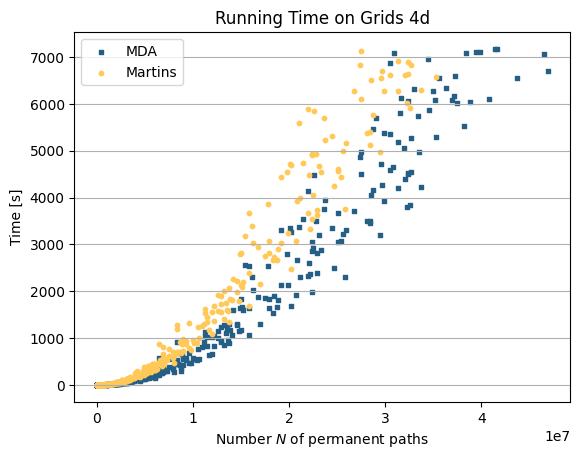

In [7]:
import matplotlib.pyplot as plt

c1 = '#FFC857'
c2 = '#255F85'

mda = list(mergedDf[mergedDf['TIME_mda'].notna()]['TIME_mda'])
xmda = list(mergedDf['EXTRACTIONS_mda'])
#martins = list(mergedDf[mergedDf['TIME_martins'].notna()]['TIME_martins'])
martins = list(mergedDf[mergedDf['TIME_martins'].notna()]['TIME_martins'])

xmartins = list(mergedDf[mergedDf['TIME_martins'].notna()]['EXTRACTIONS_martins'])
fig = plt.figure()
fig.patch.set_alpha(0.0)
ax1 = fig.add_subplot(111)

ax1.scatter(xmda, mda, s=10, c=c2, marker="s", label='MDA')
ax1.scatter(xmartins, martins, s=10, c=c1, marker="o", label='Martins')
#ax1.set_yscale('log')
ax1.yaxis.grid(True)
plt.ylabel('Time [s]')
#plt.xscale('log')
#plt.yscale('log')
plt.xlabel('Number $N$ of permanent paths')
plt.legend(loc='upper left')
plt.title(f'Running Time on Grids 4d')
#plt.savefig(f'./plots/grids_3d_martins_mda_linear.svg')
plt.show()


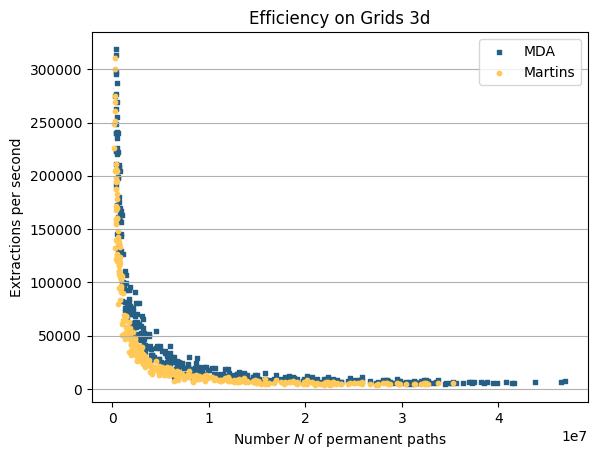

In [11]:
import matplotlib.pyplot as plt

c1 = '#FFC857'
c2 = '#255F85'

mda = list(mergedDf[mergedDf['TIME_mda']>1]['EFF_mda'])
xmda = list(mergedDf[mergedDf['TIME_mda']>1]['EXTRACTIONS_mda'])
martins = list(mergedDf[mergedDf['TIME_martins']>1]['EFF_martins'])
xmartins = list(mergedDf[mergedDf['TIME_martins']>1]['EXTRACTIONS_martins'])
fig = plt.figure()
fig.patch.set_alpha(0.0)
ax1 = fig.add_subplot(111)

ax1.scatter(xmda, mda, s=10, c=c2, marker="s", label='MDA')
ax1.scatter(xmartins, martins, s=10, c=c1, marker="o", label='Martins')
#ax1.set_yscale('log')
ax1.yaxis.grid(True)
plt.ylabel('Extractions per second')
#plt.xscale('log')
#plt.yscale('log')
plt.xlabel('Number $N$ of permanent paths')
plt.legend()
plt.title(f'Efficiency on Grids 3d')
plt.savefig(f'./plots/grids_3d_martins_mda_efficiency.svg')
#plt.show()